# ODE

$$ \vec y' = \vec f(x,\vec y) $$

$$ y_{i+1} = y_i + \phi  h $$

El metodo de Euler :
$$ \phi = \vec f(x_i,\vec y_i) $$


In [155]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def euler(f, x0, y0,xf, h):
    "MEtodo de Euler del viernes"
    l = xf - x0
    qty = int(l/h)
    print("Metodo de euler con h=%f, x0=%f, xf=%f, long=%f, N=%f"%(h,x0,xf,l,qty))
    
    xx = np.linspace(x0,xf, qty+1)
    yy = np.zeros(qty+1)
    
    xx[0] = x0
    yy[0] = y0
    
    i = 1  
    while i <= qty:
        xx[i] = xx[i-1] + h
        yy[i] = yy[i-1] + f(xx[i-1], yy[i-1])*h
        i = i + 1
    
    return np.array([xx,yy])

def euler_m(f, x0, y0,xf, h):
    "MEtodo de Euler del viernes"
    l = xf - x0
    qty = int(l/h)
    print("Metodo de euler con h=%f, x0=%f, xf=%f, long=%f, N=%f"%(h,x0,xf,l,qty))
    
    N = len(f(x0,y0)) # [0, 0]
    xx = np.linspace(x0,xf, qty+1)
    yy = np.zeros([qty+1, N])
    
    xx[0] = x0
    yy[0] = y0
    
    i = 1  
    while i <= qty:
        xx[i] = xx[i-1] + h
        yy[i] = yy[i-1] + f(xx[i-1], yy[i-1])*h
        i = i + 1
    
    return [xx,yy]

### Funciones de prueba
A continuacion vamos a definir funciones de prueba 
* Ocsilador harmonico simple
    + $y'' = -y$
* Pendulo no lineal (con vis.)
    + Sistema: $y'' + c y'+ a sin(y) = 0$
    + Estado: $\vec y = [y_0 \quad y_1]^T = [y' \quad y]^T  = [vel \quad pos]^T  $
    + $y_0' = - a sin(y_1) - c y_0  $
    + $y_1' = y_0 $
    + $\vec y' = \vec f(x, \vec y)$
    
* Balance de fuerza mase-resorte -amortiguador un grado de libertad
    + $m y'' + c y' + k y = 0$
* Sistema de primer orden
    + $ y' = -y $
* Oscilador no lineal de Van der Pol
    + $ y'' *\mu(1-y')y' = y $
* Lokta volterra
    + $u' = v(u + 2)$
    + $v' = u(1 - v)$


In [148]:
def pendulo(x, y):
    a = 1.0
    c = .0
    y_prime_0 = -a *np.sin(y[1]) -c*y[0]
    y_prime_1 = y[0]
    return np.array([y_prime_0, y_prime_1])

def van_der_pol(x,y, miu=4.0):
    return np.array([miu*(1-y[1]**2)*y[0] - y[1], y[0]])

In [35]:
import metodos.util

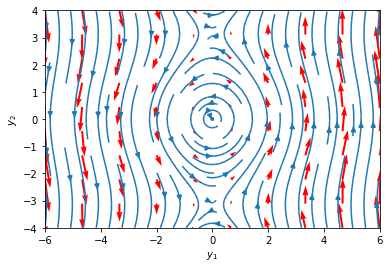

In [70]:
metodos.util.diag_fases(pendulo)

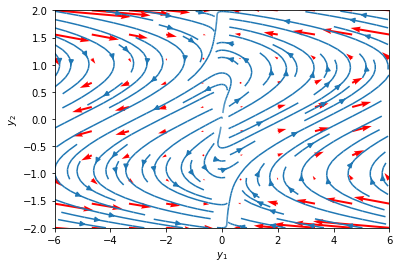

In [122]:
metodos.util.diag_fases(van_der_pol,y2_lim=[-2,2])

Metodo de euler con h=0.100000, x0=0.000000, xf=10.000000, long=10.000000, N=100.000000


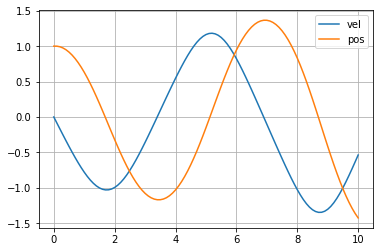

In [17]:
r = euler_m(pendulo,0.0,[0, 1],10.0, h=.1)
plt.plot(r[0],r[1][:,0],label="vel")
plt.plot(r[0],r[1][:,1],label="pos")
plt.legend(loc="best")
plt.grid()

In [6]:
def heun_m(f, x0, y0,xf, h):
    "MEtodo de Heun del martes"
    l = xf - x0
    qty = int(l/h)
    print("Metodo de euler con h=%f, x0=%f, xf=%f, long=%f, N=%f"%(h,x0,xf,l,qty))
    
    N = len(f(x0,y0)) # [0, 0]
    xx = np.linspace(x0,xf, qty+1)
    yy = np.zeros([qty+1, N])
    
    xx[0] = x0
    yy[0] = y0
    
    i = 1  
    while i <= qty:
        xx[i] = xx[i-1] + h
        y_p = yy[i-1] + f(xx[i-1], yy[i-1])*h # Prediccion
        pendiente_promedio = (f(xx[i-1], yy[i-1]) + f(xx[i], y_p))/2.0 
        yy[i] = yy[i-1]  + pendiente_promedio*h #Correccion
        #print("i=%i, y_p=%s, pp=%s , yy_i=%s"%(i,str(y_p),str(pendiente_promedio),str(yy[i])))
        i = i + 1
    
    return [xx,yy]

Metodo de euler con h=0.100000, x0=0.000000, xf=10.000000, long=10.000000, N=100.000000


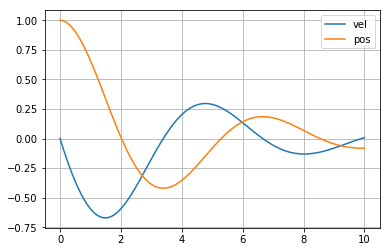

In [7]:
t,y = heun_m(pendulo,0.0,[0.0, 1.0],10.0, h=.1)
plt.plot(t,y[:,0],label="vel")
plt.plot(t,y[:,1],label="pos")
plt.legend(loc="best")
plt.grid()

In [8]:
from scipy.integrate import odeint

# Runge-Kutta de 4to Orden
El metod general de la familia de Runge Kutta
$$ y_{n+1} = y_n + h\cdot \sum_{i=1}^s {b_i k_i}$$ 
$$ s= 4$$

$ k_1 = f(t_n, y_n)$

$ k_2 = f(t_n + c_2\cdot h, \quad y_n + h(a_{21} k_1))$

$ k_3 = f(t_n + c_3\cdot h, \quad y_n + h(a_{31} k_1 + a_{32} k_2))$

$ k_4 = f(t_n + c_4\cdot h, \quad y_n + h(a_{41} k_1 + a_{42} k_2 + a_{43} k_3))$


Tablatura de Butcher:
$$ \begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & ... & ... \\
c_2 & a_{21} & a_{22} & ... & ...\\ 
c_3 & a_{31} & a_{32} & a_{33} & ... \\ 
c_4 & a_{41} & a_{42} & a_{43} & a_{44} \\  \hline
 & b_1 & b_2 & b_3 & b_4 \\ 
\end{array} $$

In [149]:
def RK4_m(f, x0, y0,xf, h, args={}):
    "MEtodo de RK4 del Jueves"
    l = xf - x0
    qty = int(l/h)
    print("Metodo de RK4 con h=%f, x0=%f, xf=%f, long=%f, N=%f"%(h,x0,xf,l,qty))
    
    N = len(f(x0,y0, **args)) # [0, 0]
    xx = np.linspace(x0,xf, qty+1)
    yy = np.zeros([qty+1, N])
    
    xx[0] = x0
    yy[0] = y0
    
    c = [0 , 1/2, 1/2 , 1]
    
    
    i = 1  
    while i <= qty:
         
        xx[i] = xx[i-1] + h

        k1 = f(xx[i-1]       , yy[i-1], **args)
        k2 = f(xx[i-1] + .5*h, yy[i-1] + h*.5*k1, **args)
        k3 = f(xx[i-1] + .5*h, yy[i-1] + h*.5*k2, **args)
        k4 = f(xx[i-1] +    h, yy[i-1] + h*k3, **args)
        
        yy[i] = yy[i-1]  + h*(k1/6 + k2/3 +k3/3 + k4/6) #Correccion
        #print("i=%i, y_p=%s, pp=%s , yy_i=%s"%(i,str(y_p),str(pendiente_promedio),str(yy[i])))
        i = i + 1
    

    return [xx,yy]

In [159]:
@interact(miu=(.1,10.0))
def p(miu):
    t,y = RK4_m(van_der_pol,0.0,[2.0, 2.0],20.0, h=.01, args={"miu":miu})
    #plt.plot(t,y[:,0],label="vel")
    plt.plot(t,y[:,1],label="pos")
    plt.plot(t,y[:,1],"o",label="pos")
    plt.legend(loc="best")
    plt.grid()

interactive(children=(FloatSlider(value=5.05, description='miu', max=10.0, min=0.1), Output()), _dom_classes=(…

Metodo de euler con h=0.010000, x0=0.000000, xf=20.000000, long=20.000000, N=2000.000000


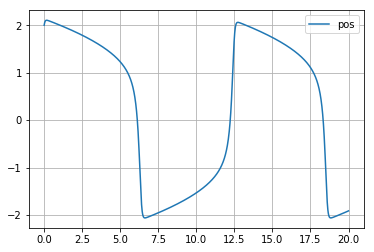

In [113]:
t,y = euler_m(van_der_pol,0.0,[2.0, 2.0],20.0, h=.01)
#plt.plot(t,y[:,0],label="vel")
plt.plot(t,y[:,1],label="pos")
plt.legend(loc="best")
plt.grid()

In [142]:
%time sum([e for e in range(10000000) if e%2==0 or e%3==0])

CPU times: user 1.73 s, sys: 472 ms, total: 2.2 s
Wall time: 2.38 s


33333331666667

In [146]:
2000 /60

33.333333333333336